In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Firstly, let's analyze the first dataset: winequality-red.

In [3]:
# read CSV using the correct delimiter (the winequality dataset uses ';')
df1 = pd.read_csv('wine+quality/winequality-red.csv', sep=';')
df2 = pd.read_csv('wine+quality/winequality-white.csv', sep=';')
# split features and target
X1 = df1.drop('quality', axis=1)
y1 = df1['quality']
X2 = df2.drop('quality', axis=1)
y2 = df2['quality']

In [4]:
X1.shape, y1.shape, X2.shape, y2.shape

((1599, 11), (1599,), (4898, 11), (4898,))

In [5]:
X1.head()
X2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [67]:
X1.info()
X1.describe()

X2.info()
X2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [68]:
X1.isnull().sum()
X2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)


features_with_nan1 = []

for feature in X_train1.columns:
    nan_count = X_train1[feature].isnull().sum()
    if nan_count > 0:
        features_with_nan1.append(feature)
        print(f"Feature '{feature}' has {nan_count} missing values.")

print(features_with_nan1)


features_with_nan2 = []

for feature in X_train2.columns:
    nan_count = X_train2[feature].isnull().sum()
    if nan_count > 0:
        features_with_nan2.append(feature)
        print(f"Feature '{feature}' has {nan_count} missing values.")

print(features_with_nan2)

[]
[]


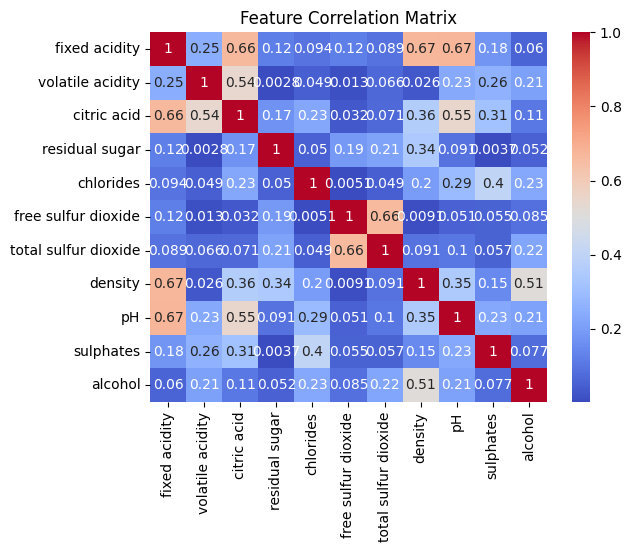

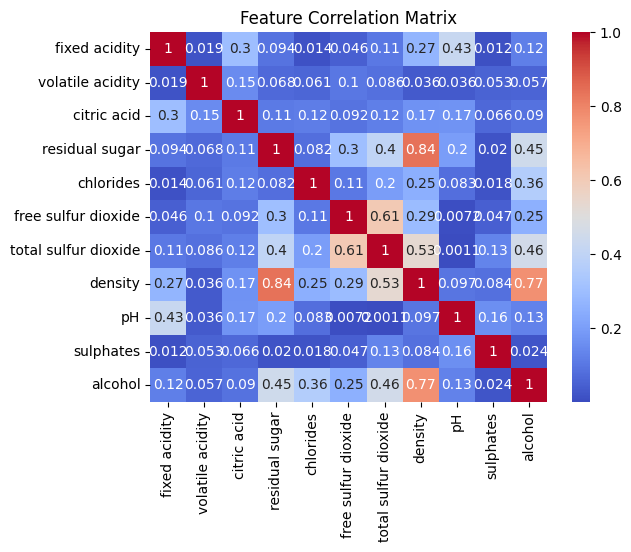

In [7]:
corr_matrix1 = X_train1.corr().abs()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


corr_matrix2 = X_train2.corr().abs()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [8]:
if "free sulfur dioxide" in X_train1.columns and "total sulfur dioxide" in X_train1.columns:
    X_train1['free_sulfur_percentage'] = X_train1['free sulfur dioxide'] / X_train1['total sulfur dioxide']
    X_test1['free_sulfur_percentage'] = X_test1['free sulfur dioxide'] / X_test1['total sulfur dioxide']

    X_train1['bound_sulfur_dioxide'] = X_train1['total sulfur dioxide'] - X_train1['free sulfur dioxide']
    X_test1['bound_sulfur_dioxide'] = X_test1['total sulfur dioxide'] - X_test1['free sulfur dioxide']

if "fixed acidity" in X_train1.columns and "volatile acidity" in X_train1.columns and "citric acid" in X_train1.columns:
    X_train1['total_acidity'] = X_train1['fixed acidity'] + X_train1['volatile acidity'] + X_train1['citric acid']
    X_test1['total_acidity'] = X_test1['fixed acidity'] + X_test1['volatile acidity'] + X_test1['citric acid']

if "free sulfur dioxide" in X_train2.columns and "total sulfur dioxide" in X_train2.columns:
    X_train2['free_sulfur_percentage'] = X_train2['free sulfur dioxide'] / X_train2['total sulfur dioxide']
    X_test2['free_sulfur_percentage'] = X_test2['free sulfur dioxide'] / X_test2['total sulfur dioxide']

    X_train2['bound_sulfur_dioxide'] = X_train2['total sulfur dioxide'] - X_train2['free sulfur dioxide']
    X_test2['bound_sulfur_dioxide'] = X_test2['total sulfur dioxide'] - X_test2['free sulfur dioxide']

if "fixed acidity" in X_train2.columns and "volatile acidity" in X_train2.columns and "citric acid" in X_train2.columns:
    X_train2['total_acidity'] = X_train2['fixed acidity'] + X_train2['volatile acidity'] + X_train2['citric acid']
    X_test2['total_acidity'] = X_test2['fixed acidity'] + X_test2['volatile acidity'] + X_test2['citric acid']

In [9]:
X_train1.head()
X_train2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free_sulfur_percentage,bound_sulfur_dioxide,total_acidity
3690,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.99100,3.30,0.31,11.5,0.246667,113.0,6.05
3463,6.2,0.30,0.31,1.6,0.035,40.0,106.0,0.98914,3.26,0.39,12.9,0.377358,66.0,6.81
683,6.4,0.27,0.32,4.5,0.240,61.0,174.0,0.99480,3.12,0.48,9.4,0.350575,113.0,6.99
3698,6.3,0.22,0.34,1.2,0.036,32.0,96.0,0.98961,3.06,0.74,11.6,0.333333,64.0,6.86
3253,5.3,0.30,0.16,4.2,0.029,37.0,100.0,0.99050,3.30,0.36,11.8,0.370000,63.0,5.76


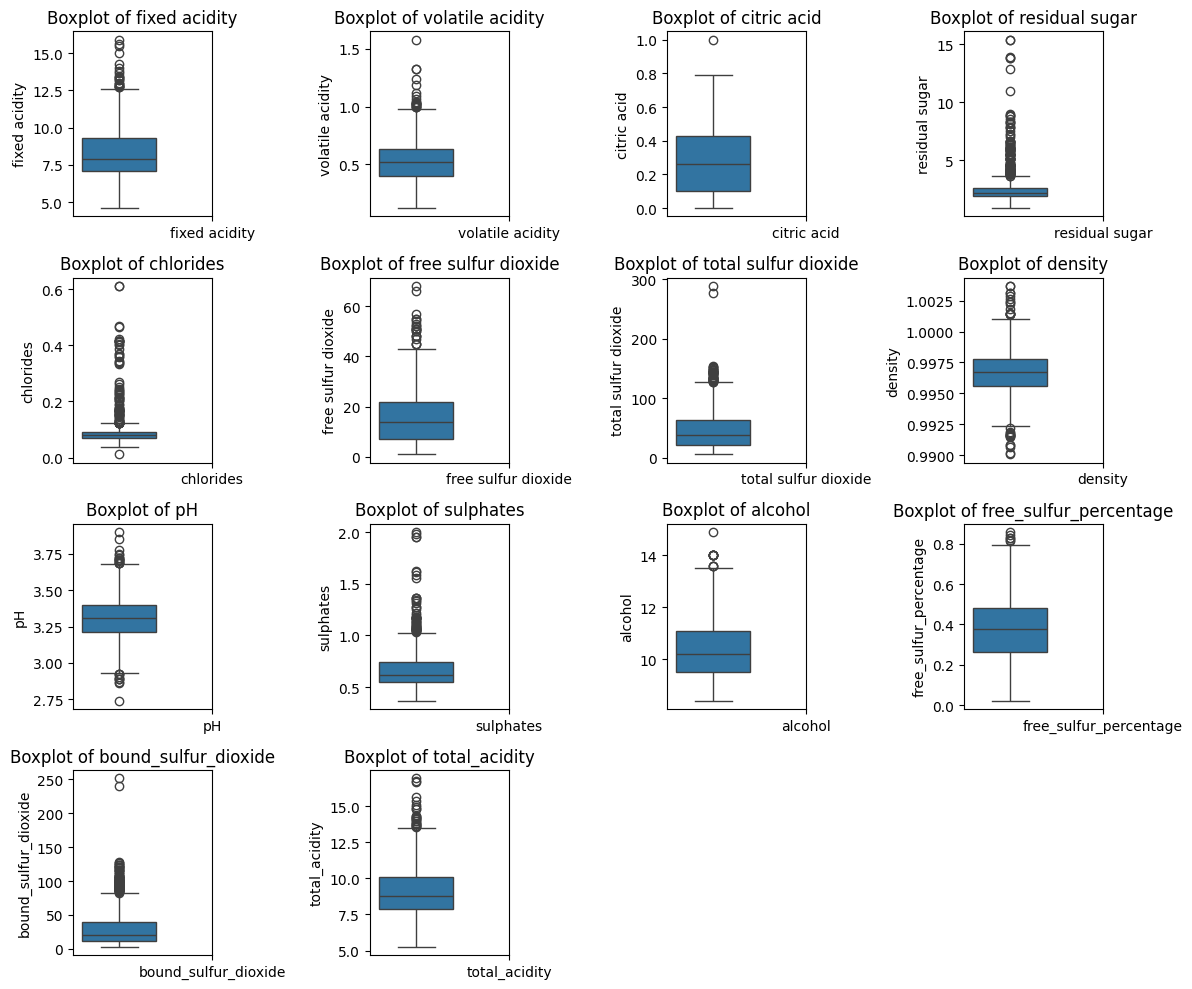

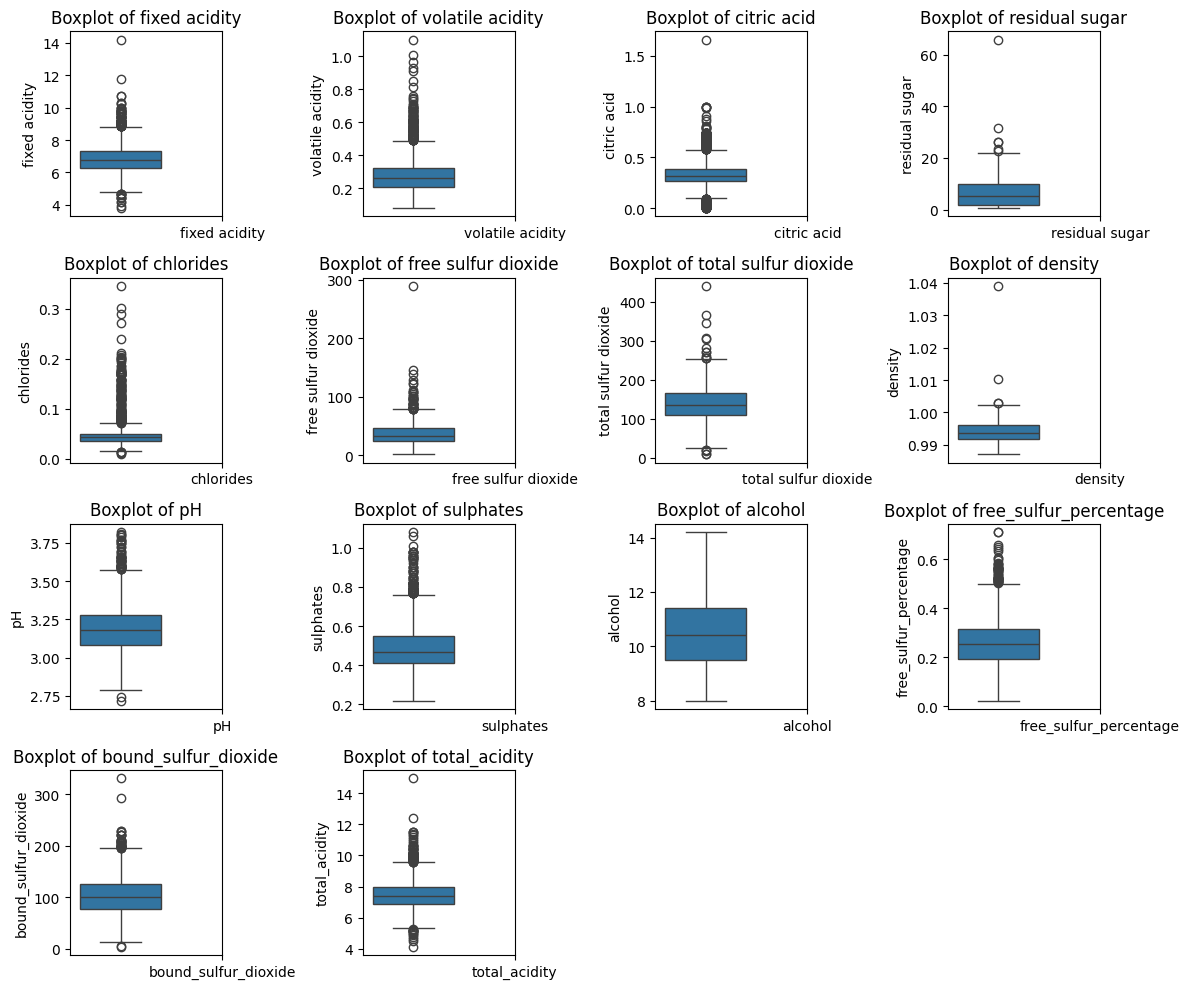

In [10]:
#outliers

# dynamic subplot grid for X_train1
n1 = len(X_train1.columns)
cols = 4
rows = int(np.ceil(n1 / cols))
plt.figure(figsize=(cols * 3, rows * 2.5))
for idx, column in enumerate(X_train1.columns):
    plt.subplot(rows, cols, idx + 1)
    sns.boxplot(y=X_train1[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks([1], [column])
plt.tight_layout()
plt.show()

# dynamic subplot grid for X_train2
n2 = len(X_train2.columns)
cols = 4
rows = int(np.ceil(n2 / cols))
plt.figure(figsize=(cols * 3, rows * 2.5))
for idx, column in enumerate(X_train2.columns):
    plt.subplot(rows, cols, idx + 1)
    sns.boxplot(y=X_train2[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks([1], [column])
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import RobustScaler

scaler1 = RobustScaler()
scaler2 = RobustScaler()

numerical_features1 = [column for column in X_train1.columns if X_train1[column].dtype in ['int64', 'float64']]
numerical_features2 = [column for column in X_train2.columns if X_train2[column].dtype in ['int64', 'float64']]

X_train_scaled1 = pd.DataFrame(scaler1.fit_transform(X_train1[numerical_features1]), columns=numerical_features1, index=X_train1.index)
X_test_scaled1 = pd.DataFrame(scaler1.transform(X_test1[numerical_features1]), columns=numerical_features1, index=X_test1.index)

X_train_scaled2 = pd.DataFrame(scaler2.fit_transform(X_train2[numerical_features2]), columns=numerical_features2, index=X_train2.index)
X_test_scaled2 = pd.DataFrame(scaler2.transform(X_test2[numerical_features2]), columns=numerical_features2, index=X_test2.index)

X_train1.drop(columns=numerical_features1, inplace=True)
X_test1.drop(columns=numerical_features1, inplace=True)

X_train2.drop(columns=numerical_features2, inplace=True)
X_test2.drop(columns=numerical_features2, inplace=True)

X_train1 = pd.concat([X_train1, X_train_scaled1], axis=1)
X_test1 = pd.concat([X_test1, X_test_scaled1], axis=1)

X_train2 = pd.concat([X_train2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test2, X_test_scaled2], axis=1)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.001),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

results1 = []
results2 = []

for model_name, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    r2_1 = r2_score(y_test1, y_pred1)
    rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
    mae1 = mean_absolute_error(y_test1, y_pred1)
    results1.append((model_name, r2_1, rmse1, mae1))

    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)
    r2_2 = r2_score(y_test2, y_pred2)
    rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
    mae2 = mean_absolute_error(y_test2, y_pred2)
    results2.append((model_name, r2_2, rmse2, mae2))


results_df1 = pd.DataFrame(results1, columns=['Model', 'R2 Score', 'RMSE', 'MAE'])
results_df2 = pd.DataFrame(results2, columns=['Model', 'R2 Score', 'RMSE', 'MAE'])

print("Red Wine Quality Prediction Results:")
print(results_df1)

print("White Wine Quality Prediction Results:")
print(results_df2)


cv_scores_models1 = []
cv_scores_models2 = []

for model_name, model in models.items():
    cv_scores1 = cross_val_score(model, X_train1, y_train1, cv=5, scoring='r2')
    cv_scores_models1.append((model_name, cv_scores1.mean()))

    cv_scores2 = cross_val_score(model, X_train2, y_train2, cv=5, scoring='r2')
    cv_scores_models2.append((model_name, cv_scores2.mean()))

print("Cross-Validation Scores for Red Wine Models:")
for model_name, mean_score in cv_scores_models1:
    print(f"{model_name}: Mean R2 = {mean_score:.4f}")

print("Cross-Validation Scores for White Wine Models:")
for model_name, mean_score in cv_scores_models2:
    print(f"{model_name}: Mean R2 = {mean_score:.4f}")

Red Wine Quality Prediction Results:
                     Model  R2 Score      RMSE       MAE
0        Linear Regression  0.364157  0.640541  0.495288
1         Ridge Regression  0.364418  0.640410  0.495160
2         Lasso Regression  0.365162  0.640034  0.494502
3  Random Forest Regressor  0.507063  0.563985  0.413556
4        XGBoost Regressor  0.505613  0.564814  0.411249
White Wine Quality Prediction Results:
                     Model  R2 Score      RMSE       MAE
0        Linear Regression  0.278302  0.752687  0.586715
1         Ridge Regression  0.278213  0.752733  0.586717
2         Lasso Regression  0.277566  0.753071  0.586612
3  Random Forest Regressor  0.505247  0.623205  0.458872
4        XGBoost Regressor  0.451197  0.656364  0.503948
Cross-Validation Scores for Red Wine Models:
Linear Regression: Mean R2 = 0.3443
Ridge Regression: Mean R2 = 0.3444
Lasso Regression: Mean R2 = 0.3454
Random Forest Regressor: Mean R2 = 0.4646
XGBoost Regressor: Mean R2 = 0.4279
Cross-Valid

In [1]:
cv_df1 = pd.DataFrame(cv_scores_models1, columns=['Model', 'Mean R2 Score'])
cv_df2 = pd.DataFrame(cv_scores_models2, columns=['Model', 'Mean R2 Score'])

best_model_idx1 = cv_df1['Mean R2 Score'].idxmax()
best_model_idx2 = cv_df2['Mean R2 Score'].idxmax()

best_model1 = cv_df1.loc[best_model_idx1]
best_model2 = cv_df2.loc[best_model_idx2]

print("Best Model for Red Wine Quality Prediction:")
print(best_model1)
print("Best Model for White Wine Quality Prediction:")
print(best_model2)

NameError: name 'pd' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(200, 1000),      
    'max_depth': [10, 15, 20, 25, 30, None],  
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 10),     
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.7, 0.9],
    'bootstrap': [True, False],               
    'criterion': ['squared_error', 'absolute_error'] 
}

rf = RandomForestRegressor(random_state=42)

print("Hyperparameter Tuning for Red Wine")
random1 = RandomizedSearchCV(
    rf, param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1, 
    verbose=1
)
random1.fit(X_train1, y_train1)

print("Best parameters for Red Wine:")
print(random1.best_params_)
print(f"Best CV R²: {random1.best_score_:.4f}")

print("\nHyperparameter Tuning for White Wine")
random2 = RandomizedSearchCV(
    rf, param_grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1, 
    verbose=1
)
random2.fit(X_train2, y_train2)

print("Best parameters for White Wine:")
print(random2.best_params_)
print(f"Best CV R²: {random2.best_score_:.4f}")

Hyperparameter Tuning for Red Wine
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\dorot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

Best parameters for Red Wine:
{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 0.7, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 300}
Best CV R²: 0.4358

Hyperparameter Tuning for White Wine
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [51]:
random_forest_red = RandomForestRegressor(n_estimators=random1.best_params_['n_estimators'],
                                     max_depth=random1.best_params_['max_depth'],
                                     random_state=42)
random_forest_red.fit(X_train1, y_train1)
y_pred_red = random_forest_red.predict(X_test1)

mae_red = mean_absolute_error(y_test1, y_pred_red)
rmse_red = np.sqrt(mean_squared_error(y_test1, y_pred_red))
r2_red = r2_score(y_test1, y_pred_red)

print("Red Wine Quality Prediction with Tuned Random Forest:")
print(f"MAE: {mae_red:.4f}")
print(f"RMSE: {rmse_red:.4f}")
print(f"R2 Score: {r2_red:.4f}")

Red Wine Quality Prediction with Tuned Random Forest:
MAE: 0.4183
RMSE: 0.5654
R2 Score: 0.5046


In [52]:
random_forest_white = RandomForestRegressor(n_estimators=random2.best_params_['n_estimators'],
                                       max_depth=random2.best_params_['max_depth'],
                                       random_state=42)

random_forest_white.fit(X_train2, y_train2)
y_pred_white = random_forest_white.predict(X_test2)
mae_white = mean_absolute_error(y_test2, y_pred_white)
rmse_white = np.sqrt(mean_squared_error(y_test2, y_pred_white))
r2_white = r2_score(y_test2, y_pred_white)

print("White Wine Quality Prediction with Tuned Random Forest:")
print(f"MAE: {mae_white:.4f}")
print(f"RMSE: {rmse_white:.4f}")
print(f"R2 Score: {r2_white:.4f}")

White Wine Quality Prediction with Tuned Random Forest:
MAE: 0.4416
RMSE: 0.6154
R2 Score: 0.5176


R2 Score on test set is too low, must be updated